**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
class_name = 'Occupancy'
df = pd.read_csv('occupancy_data/datatraining.txt', skipinitialspace=True, na_values='?', keep_default_na=True)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
def daytime(h):
    if 6 <= h < 13:
        return 'morning'
    elif 13 <= h < 18:
        return 'afternoon'
    elif 18 <= h < 22:
        return 'evening'
    return 'night'

In [4]:
df['daytime'] = [daytime(d.hour) for d in pd.to_datetime(df['date'])]
df['weekend'] = [1 if d.weekday() >= 5 else 0 for d in pd.to_datetime(df['date'])]
columns2remove = ['date']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,daytime,weekend
1,23.18,27.2720,426.0,721.25,0.004793,1,afternoon,0
2,23.15,27.2675,429.5,714.00,0.004783,1,afternoon,0
3,23.15,27.2450,426.0,713.50,0.004779,1,afternoon,0
4,23.15,27.2000,426.0,708.25,0.004772,1,afternoon,0
5,23.10,27.2000,426.0,704.50,0.004757,1,afternoon,0


In [5]:
df0 = df.copy()

In [6]:
dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
dfY = df[class_name]
df = pd.concat([dfX, dfY], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,weekend,daytime=afternoon,daytime=evening,daytime=morning,daytime=night,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,0,1,0,0,0,1
2,23.15,27.2675,429.5,714.00,0.004783,0,1,0,0,0,1
3,23.15,27.2450,426.0,713.50,0.004779,0,1,0,0,0,1
4,23.15,27.2000,426.0,708.25,0.004772,0,1,0,0,0,1
5,23.10,27.2000,426.0,704.50,0.004757,0,1,0,0,0,1


# Data Partitioning

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [8]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

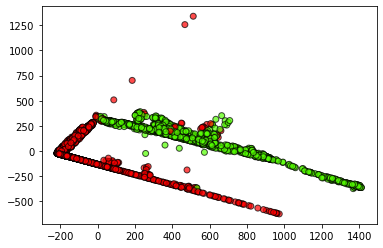

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [12]:
from sklearn.svm import LinearSVC

In [13]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



/home/dm2/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



/home/dm2/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [15]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



/home/dm2/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
decision_function = clf.decision_function(X_train)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train[support_vector_indices]

In [17]:
support_vectors_pca = pca.transform(support_vectors)

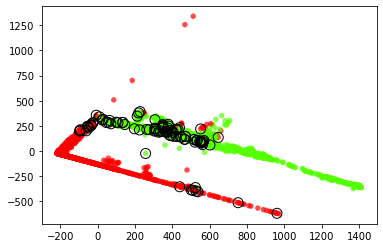

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Effect of C

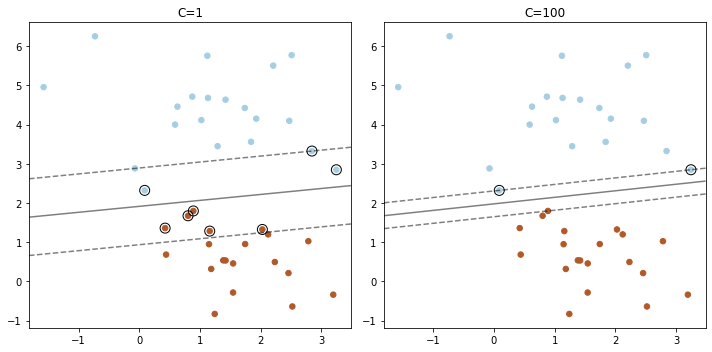

In [19]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99398693 0.97832234]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [23]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9893573475235367
F1-score [0.99320794 0.97542533]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [24]:
clf.support_

array([   9,   53,   76,   89,  109,  145,  149,  214,  222,  223,  283,
        340,  364,  365,  372,  404,  475,  480,  487,  526,  529,  575,
        584,  590,  616,  630,  638,  673,  686,  720,  725,  734,  746,
        797,  847,  887,  890,  904,  910,  916,  933, 1037, 1059, 1148,
       1151, 1155, 1186, 1187, 1188, 1239, 1256, 1262, 1283, 1303, 1349,
       1381, 1382, 1423, 1468, 1545, 1591, 1593, 1604, 1669, 1682, 1706,
       1756, 1823, 1880, 1945, 1948, 1969, 1981, 1986, 2009, 2026, 2038,
       2042, 2057, 2063, 2115, 2126, 2130, 2165, 2260, 2264, 2384, 2390,
       2440, 2520, 2549, 2587, 2590, 2602, 2609, 2669, 2705, 2711, 2796,
       2995, 3016, 3021, 3104, 3113, 3127, 3147, 3157, 3193, 3197, 3239,
       3244, 3268, 3274, 3276, 3284, 3313, 3320, 3339, 3396, 3417, 3434,
       3496, 3552, 3686, 3718, 3728, 3772, 3811, 3823, 3853, 3879, 3925,
       3928, 3943, 3947, 3968, 3984, 4060, 4084, 4094, 4104, 4126, 4145,
       4149, 4193, 4218, 4274, 4280, 4291, 4315, 43

In [25]:
clf.support_vectors_[:10]

array([[ 0.97604329, -1.03474398, -0.26839892,  0.48943901, -0.79081852,
        -0.73691436, -0.47435864, -0.46294292,  1.58493369, -0.74202323],
       [-0.60547982, -1.23622845, -0.61221239, -0.51970352, -1.33340744,
        -0.73691436, -0.47435864,  2.16009351, -0.63094122, -0.74202323],
       [ 1.65807513,  0.07251299, -0.19313627,  0.95396494,  0.57246297,
        -0.73691436,  2.1081096 , -0.46294292, -0.63094122, -0.74202323],
       [-0.40778943, -1.30702029, -0.61221239, -0.54853617, -1.36060856,
        -0.73691436, -0.47435864, -0.46294292,  1.58493369, -0.74202323],
       [ 1.65807513,  0.07251299,  1.9715202 ,  0.92032685,  0.57246297,
        -0.73691436,  2.1081096 , -0.46294292, -0.63094122, -0.74202323],
       [ 1.07488848, -0.88226925, -0.61221239,  0.55511336, -0.60842281,
        -0.73691436, -0.47435864,  2.16009351, -0.63094122, -0.74202323],
       [ 0.08643654, -0.59592534,  1.57382551, -0.46444096, -0.56232918,
        -0.73691436, -0.47435864, -0.46294292

In [26]:
clf.n_support_, len(X_train)

(array([194, 193], dtype=int32), 5700)

## Effect of Different Kernels

<ipython-input-27-7db5b923b882>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-27-7db5b923b882>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-27-7db5b923b882>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals

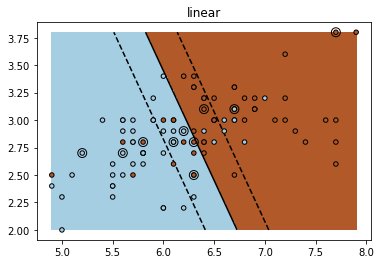

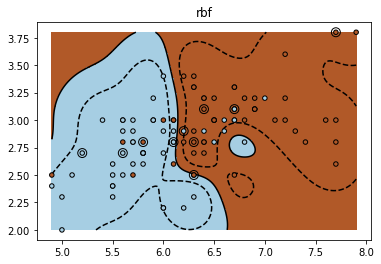

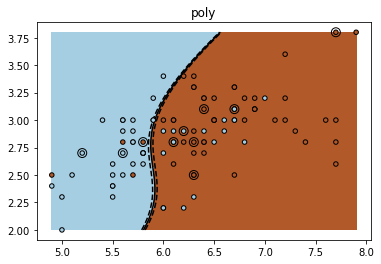

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()